In [4]:
from HGCal_ImageAlgo3D import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/home/zchen/Documents/ImageAlogrithm3D/data/'
DatasetFile = 'CMSSW93X_pt35_pu200'

In [5]:
df = pd.read_pickle(DatasetDir+"input/"+DatasetFile+"_rechit.pkl")

# 1. Run clustering

In [6]:
imagalgo = ImagingAlgo(AFFINITY_Z     = 1.2,
                       KERNAL_R       = 4.0,
                       KERNAL_Z       = 2, # layer
                       KERNAL_EXPC    = 0.5,
                       MAXDISTANCE    = 200,
                       DECISION_RHO_KAPPA = 10,
                       DECISION_NHD   = 4.0,
                       CONTINUITY_NHD = 6.0)
dfresultclus = imagalgo.RunImagingAlgo(df,N=100)
dfresultclus.to_pickle("../data/output/"+DatasetFile+"_OutputClus.pkl")

100%|██████████| 99/99 [04:05<00:00,  2.48s/it]


# 2. Resolution Plots

PU000 EnergyEff: 0.7804+/-0.1251
PU200 EnergyEff: 0.9885+/-0.2892


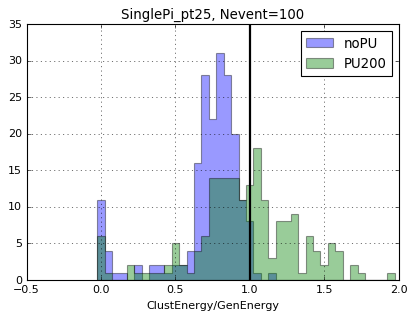

In [11]:
from utility_benchmark import *
bm000 = Benchmark('CMSSW93X_pt35_pu000', N=100)
bm200 = Benchmark('CMSSW93X_pt35_pu200', N=100)

deltarho = 5
energyeff000 = bm000.getEnergyEfficiency(deltarho)
energyeff200 = bm200.getEnergyEfficiency(deltarho)
    
plt.hist(energyeff000,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="noPU")
plt.hist(energyeff200,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="PU200")
plt.axvline(1,lw=2,c="k")
plt.grid(True)
plt.legend()
plt.xlabel("ClustEnergy/GenEnergy")
plt.title("SinglePi_pt25, Nevent=100")
plt.savefig("../plot/pu200.png")


sigma000,mean000 = bm000.getEffSigma_EnergyEfficiency(deltarho)
sigma200,mean200 = bm200.getEffSigma_EnergyEfficiency(deltarho)
print("PU000 EnergyEff: {:6.4}+/-{:6.4}".format(mean000,sigma000))
print("PU200 EnergyEff: {:6.4}+/-{:6.4}".format(mean200,sigma200))